# Tennis Ace Project

This project aims to create a linear regression model which predicts the outcome for a tennis player based on their playing habits. By analysing and modelling the [Association of Tennis Professionals (ATP)](https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals) data, provided by [Codecademy](https://www.codecademy.com/learn), hopefully we will be able to determine what it takes to be one of the best tennis players in the world.


Import modules.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png2x')

## Load and Investigate Data

The `tennis_stats.csv` file contains a wide array of tennis statistics. The columns can be broken down into four distinct groups: Identifying Data; Service Games; Return Games and Outcomes. 

Identifying Data:
* `Player` - Name of the player
* `Year` - Year the data was recorded

Service Games:
* `Aces` - Number of serves by the player where the receiver does not touch the ball
* `DoubleFaults` - Number of times player missed both first and second serve attempts
* `FirstServe` - % of first-serve attempts made
* `FirstServePointsWon` - % of first-serve attempt points won by the player
* `SecondServePointsWon` - % of second-serve attempt points won by the player
* `BreakPointsFaced` - Number of times where the receiver could have won service game of the player
* `BreakPointsSaved` - % of the time the player was able to stop the receiver from winning service game when they had the chance
* `ServiceGamesPlayed` - Total number of games where the player served
* `ServiceGamesWon` -  Total number of games where the player served and won
* `TotalServicePointsWon` - % of points in games where the player served that they won

Return Games:
* `FirstServeReturnPointsWon` - % of opponents first-serve points the player was able to win
* `SecondServeReturnPointsWon` - % of opponents second-serve points the player was able to win
* `BreakPointsOpportunities` - Number of times where the player could have won the service game of the opponent
* `BreakPointsConverted` - % of the time the player was able to win their opponent’s service game when they had the chance
* `ReturnGamesPlayed` - Total number of games where the player’s opponent served
* `ReturnGamesWon` - Total number of games where the player’s opponent served and the player won
* `ReturnPointsWon` - Total number of points where the player’s opponent served and the player won
* `TotalPointsWon` - % of points won by the player

Outcomes:
* `Wins` - Number of matches won in a year
* `Losses` - Number of matches lost in a year
* `Winnings` - Total winnings in USD($) in a year
* `Rankings` - Ranking at the end of year

In [25]:
df = pd.read_csv('tennis_stats.csv')
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [26]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


## Exploratory Analysis

In this section we want to investigate the correlation between features. Specifically, we are interested in how the features correlate to the performance indicators: `Wins`, `Winnings` and `Ranking`. For the first two, we are interested in strong positive correlations whereas for `Ranking` we are interested in strong negative correlations as the lower the rank the better.

In [27]:
df.corr()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


Features which show desired correlation with performance indicators: `Aces`, `BreakPointsConverted`, `BreakPointsFaced`, `BreakPointsOpportunities`.

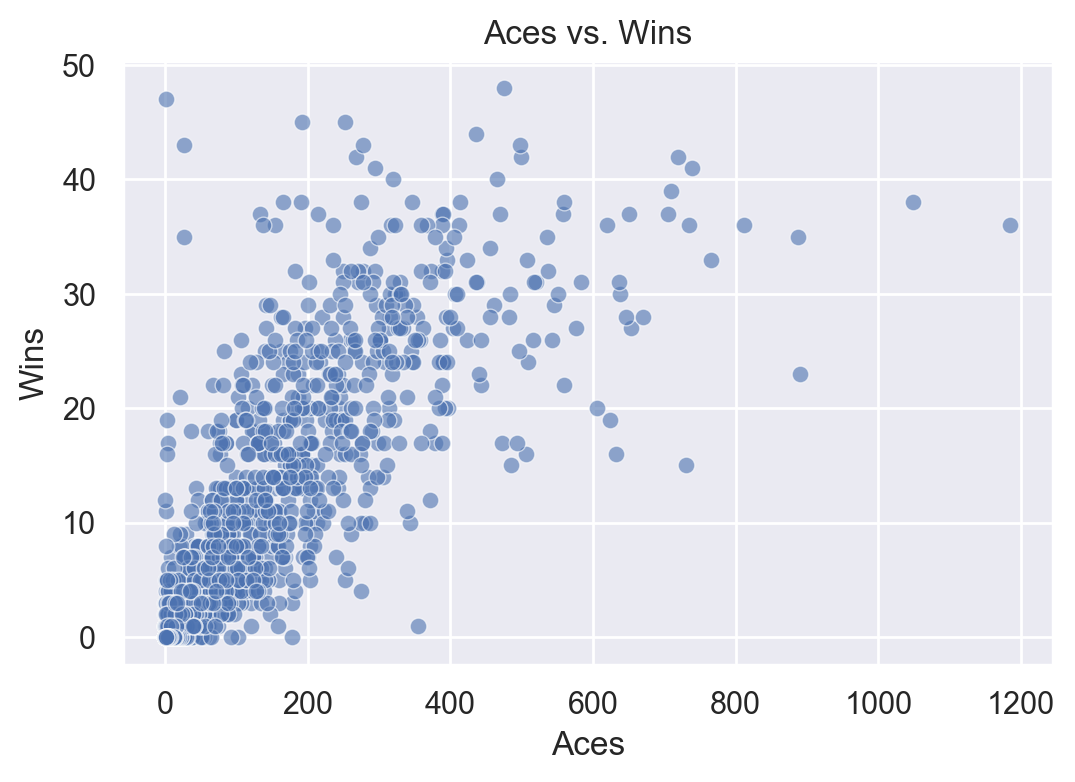

<Figure size 600x400 with 0 Axes>

In [28]:
sns.scatterplot(x = df.Aces, y = df.Wins, alpha = 0.6)
plt.title('Aces vs. Wins')
plt.show()
plt.clf()

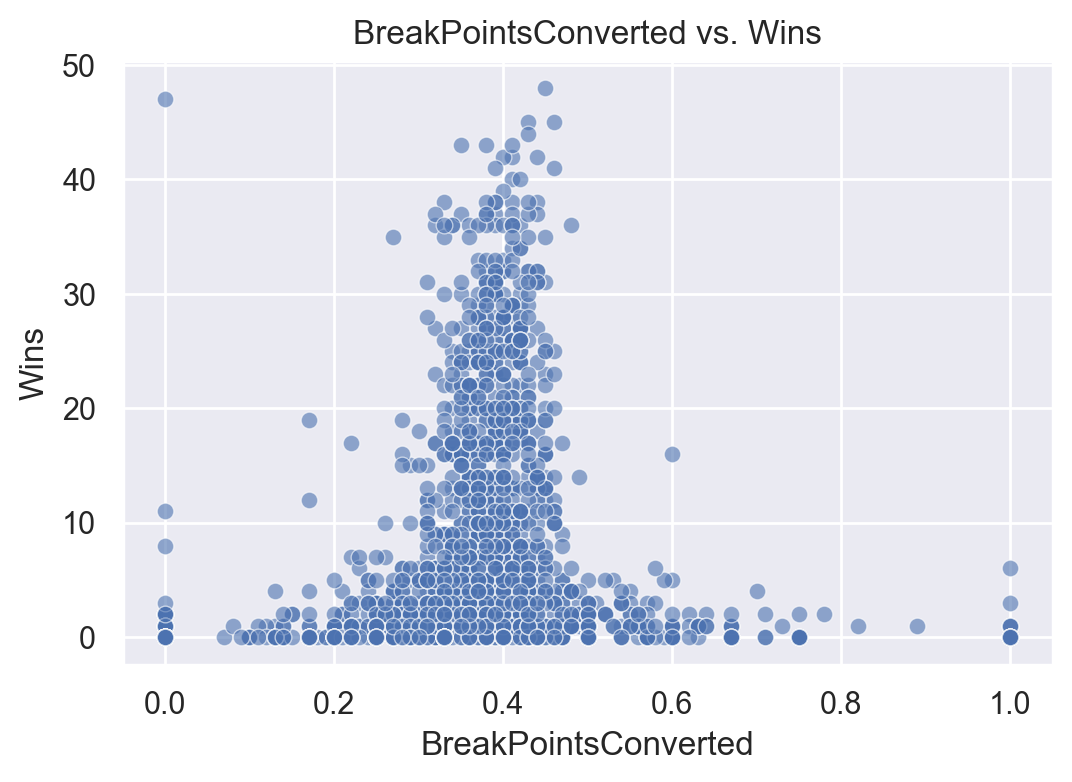

<Figure size 600x400 with 0 Axes>

In [29]:
sns.scatterplot(x = df.BreakPointsConverted, y = df.Wins, alpha = 0.6)
plt.title('BreakPointsConverted vs. Wins')
plt.show()
plt.clf()

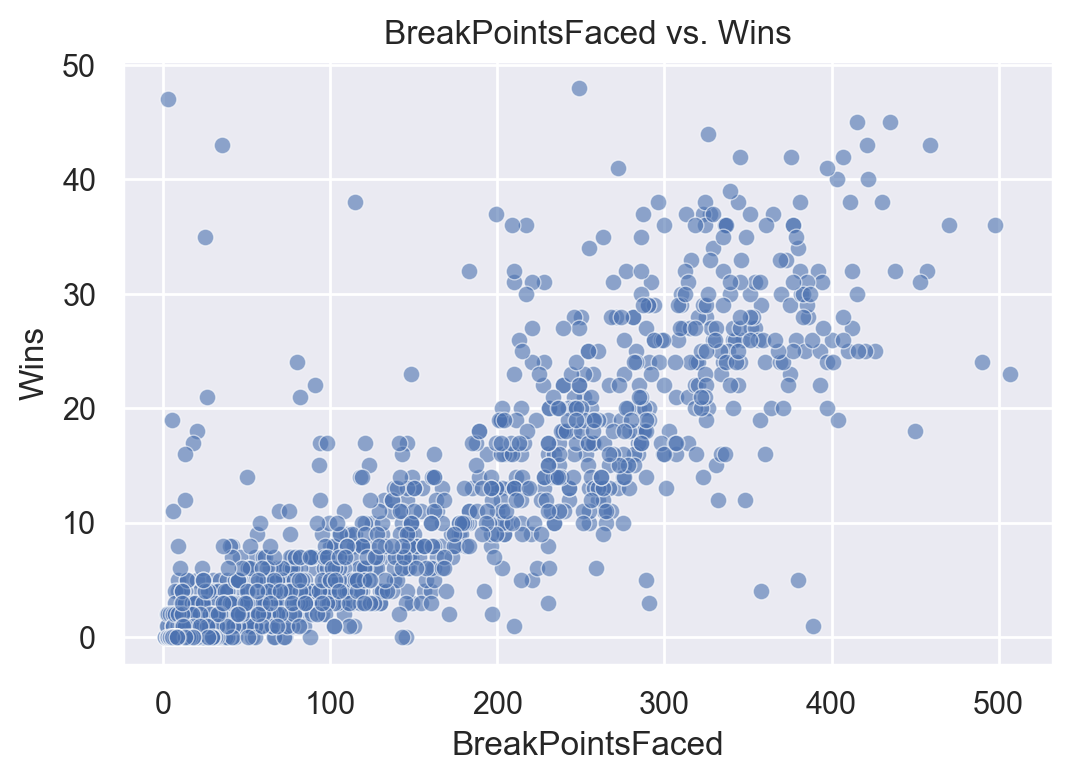

<Figure size 600x400 with 0 Axes>

In [30]:
sns.scatterplot(x = df.BreakPointsFaced, y = df.Wins, alpha = 0.6)
plt.title('BreakPointsFaced vs. Wins')
plt.show()
plt.clf()

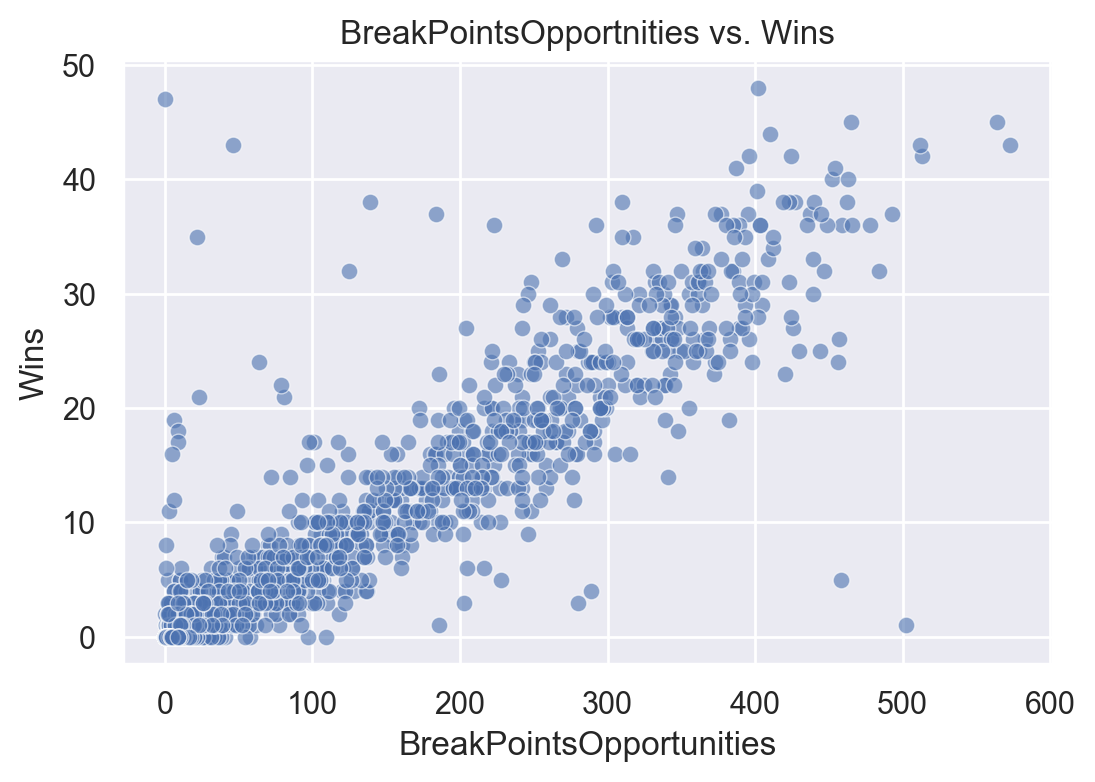

<Figure size 600x400 with 0 Axes>

In [31]:
sns.scatterplot(x = df.BreakPointsOpportunities, y = df.Wins, alpha = 0.6)
plt.title('BreakPointsOpportnities vs. Wins')
plt.show()
plt.clf()

Features that one would expect to have good correlation with performance indicators: `FirstServeReturnPointsWon`, `TotalPointsWon` and `TotalServicePointsWon`.

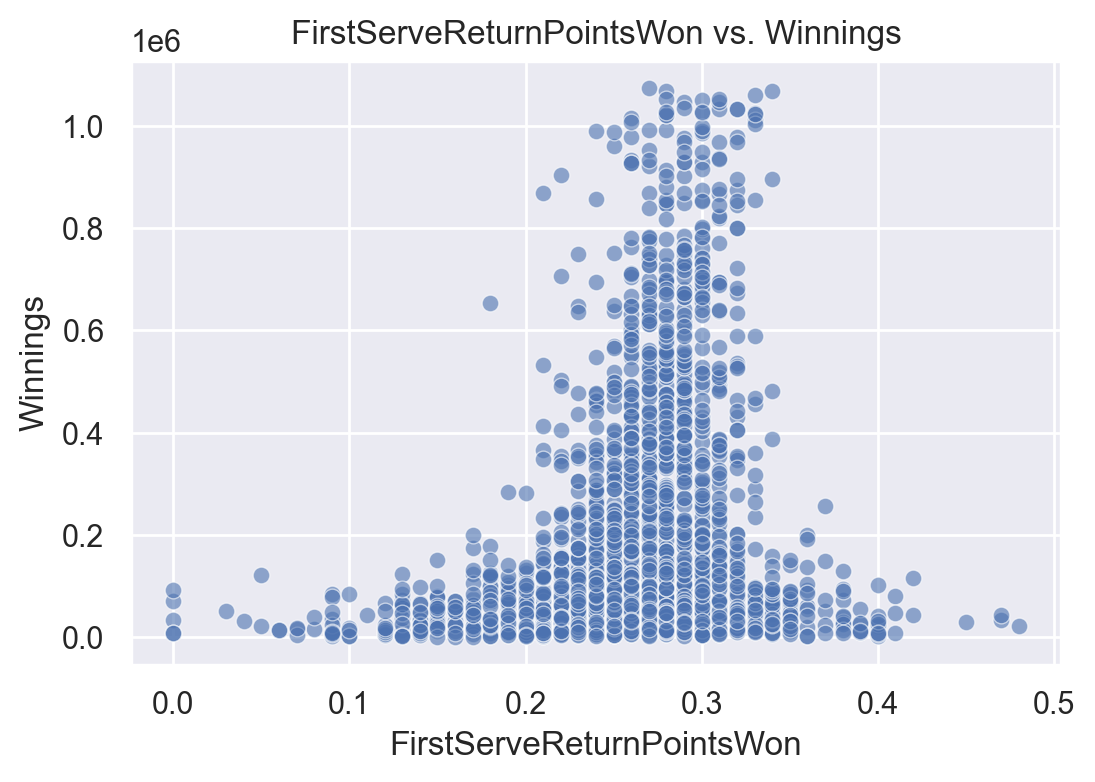

<Figure size 600x400 with 0 Axes>

In [32]:
sns.scatterplot(x = df.FirstServeReturnPointsWon, y = df.Winnings, alpha = 0.6)
plt.title('FirstServeReturnPointsWon vs. Winnings')
plt.show()
plt.clf()

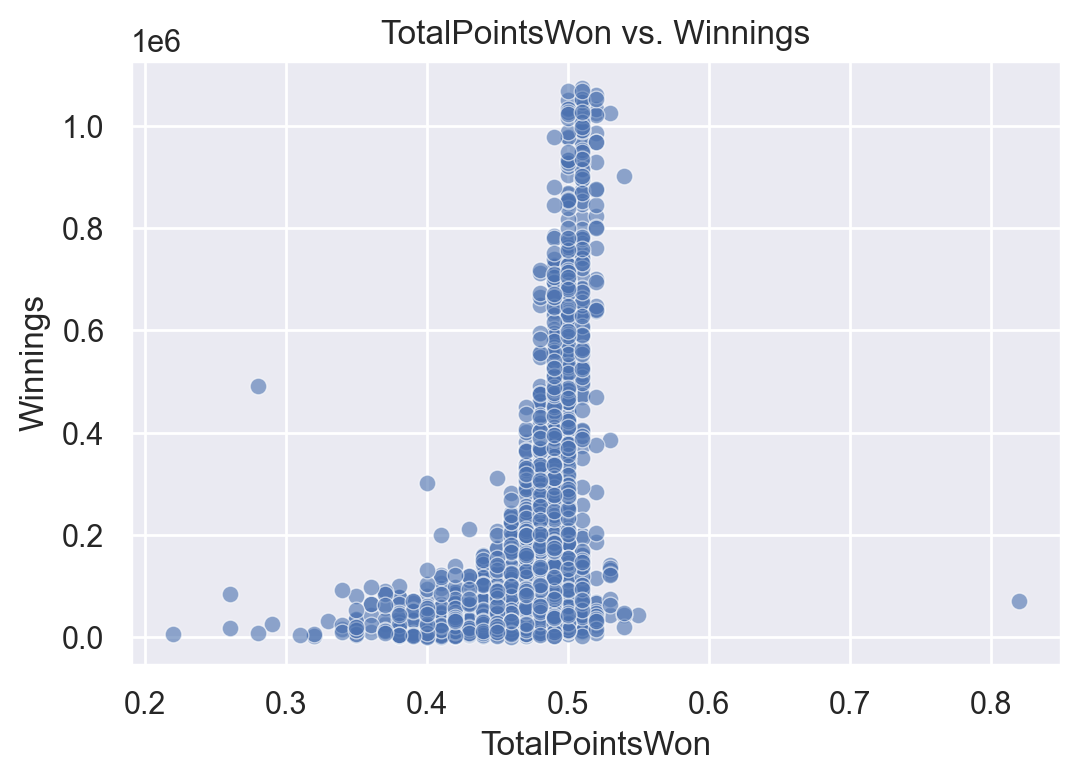

<Figure size 600x400 with 0 Axes>

In [33]:
sns.scatterplot(x = df.TotalPointsWon, y = df.Winnings, alpha = 0.6)
plt.title('TotalPointsWon vs. Winnings')
plt.show()
plt.clf()

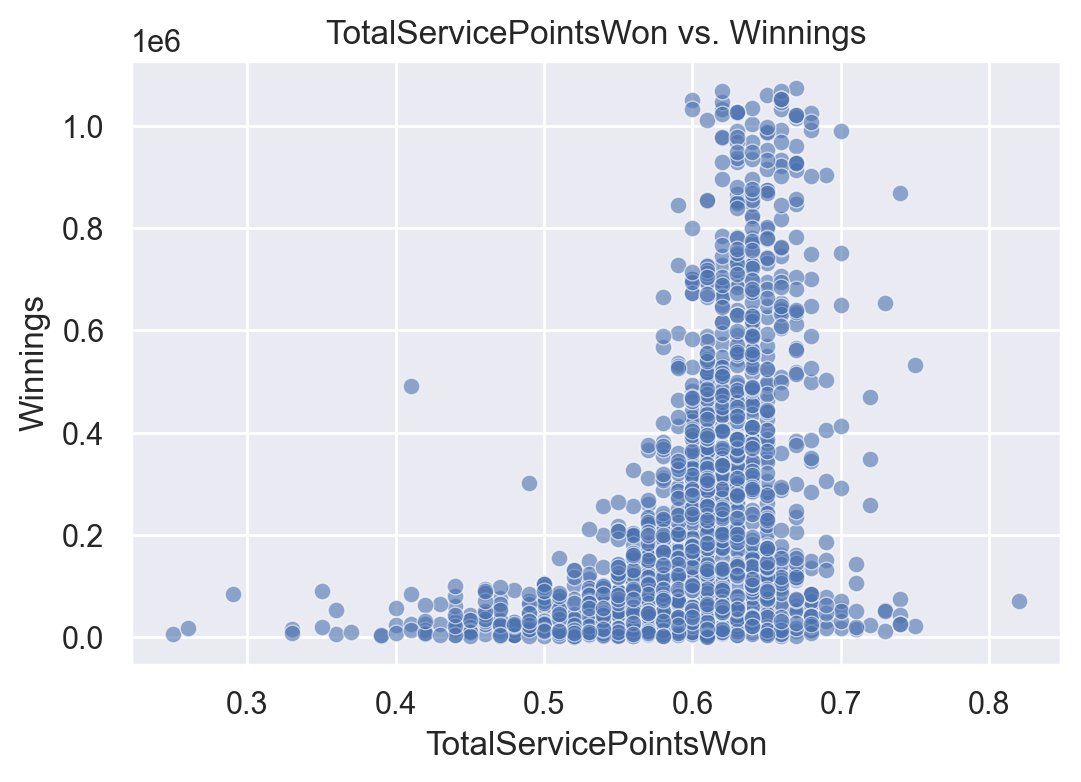

<Figure size 600x400 with 0 Axes>

In [34]:
sns.scatterplot(x = df.TotalServicePointsWon, y = df.Winnings, alpha = 0.6)
plt.title('TotalServicePointsWon vs. Winnings')
plt.show()
plt.clf()

## Single Feature Linear Regression

### Aces

Predicting Wins with Aces Test Score: 0.737586902203168


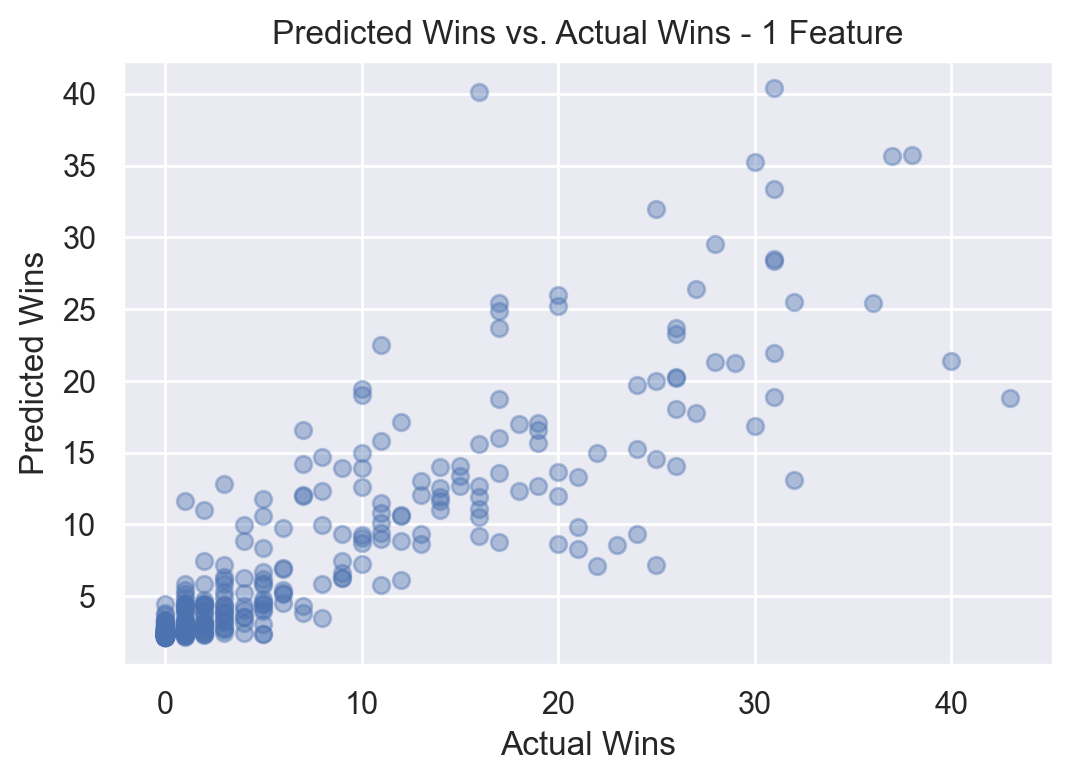

<Figure size 600x400 with 0 Axes>

In [43]:
# select features and value to predict
feature= df[['Aces']]
wins = df[['Wins']]

# train, test, split the data
feature_train, feature_test, wins_train, wins_test = train_test_split(feature, wins, train_size = 0.8, test_size = 0.2)

# create and train model on training data
model = LinearRegression()
model.fit(feature_train, wins_train)

# score model on test data
print('Predicting Wins with Aces Test Score:', model.score(feature_test, wins_test))

# make predictions with model
wins_prediction = model.predict(feature_test)

# plot predictions against actual winnings
plt.scatter(wins_test, wins_prediction, alpha= 0.4)
plt.title('Predicted Wins vs. Actual Wins - 1 Feature')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()
plt.clf()

### BeakPointsOpportunities

Predicting Wins with BreakPointsOpportunities Test Score: 0.872652620013677


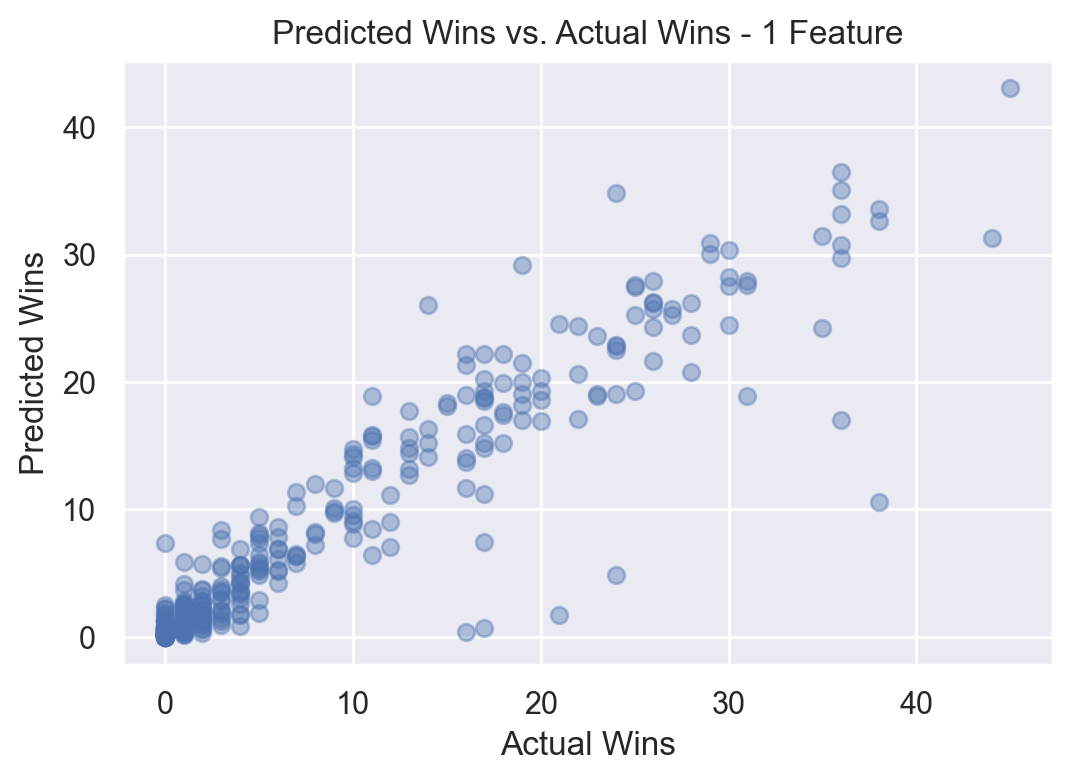

<Figure size 600x400 with 0 Axes>

In [36]:
# select features and value to predict
feature= df[['BreakPointsOpportunities']]
wins = df[['Wins']]

# train, test, split the data
feature_train, feature_test, wins_train, wins_test = train_test_split(feature, wins, train_size = 0.8, test_size = 0.2)

# create and train model on training data
model = LinearRegression()
model.fit(feature_train, wins_train)

# score model on test data
print('Predicting Wins with BreakPointsOpportunities Test Score:', model.score(feature_test, wins_test))

# make predictions with model
wins_prediction = model.predict(feature_test)

# plot predictions against actual winnings
plt.scatter(wins_test, wins_prediction, alpha= 0.4)
plt.title('Predicted Wins vs. Actual Wins - 1 Feature')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()
plt.clf()

## Two Feature Linear Regression 

Predicting Wins with BreakPointsFaced and TotalPointsWon Test Score: 0.7756436837116168


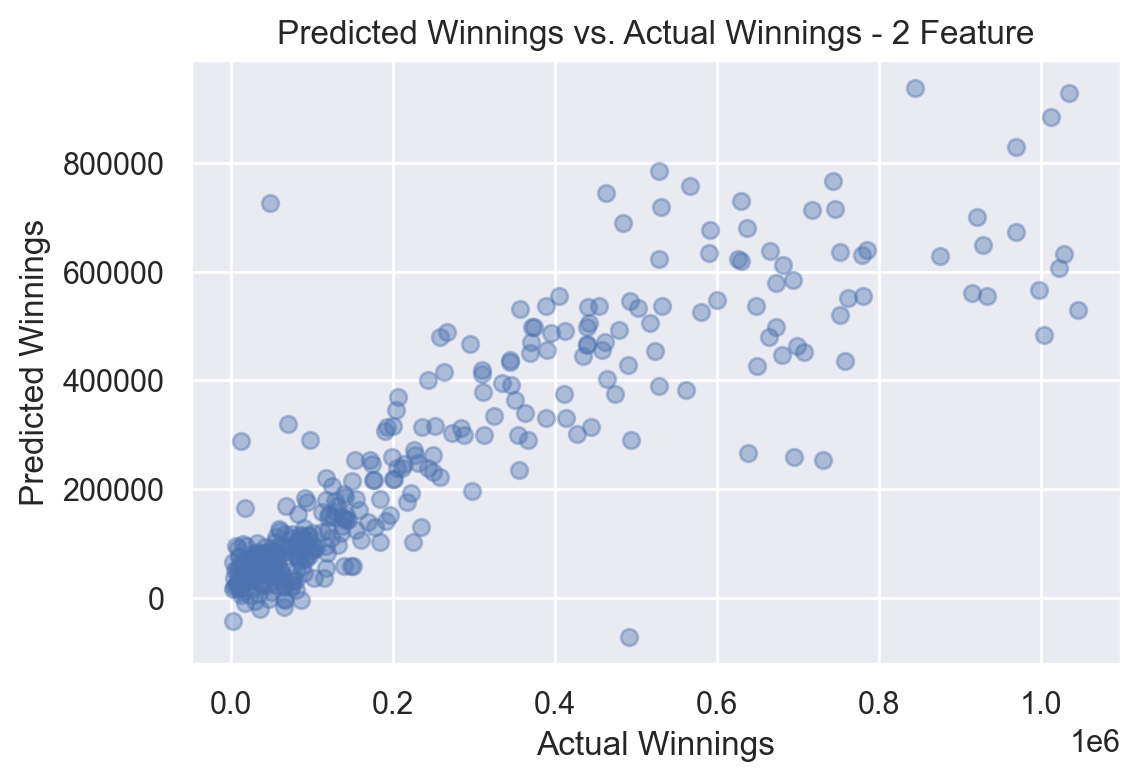

<Figure size 600x400 with 0 Axes>

In [41]:
# select features and value to predict
feature= df[['BreakPointsFaced', 'TotalPointsWon']]
winnings = df[['Winnings']]

# train, test, split the data
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8, test_size = 0.2)

# create and train model on training data
model = LinearRegression()
model.fit(feature_train, winnings_train)

# score model on test data
print('Predicting Wins with BreakPointsFaced and TotalPointsWon Test Score:', model.score(feature_test, winnings_test))

# make predictions with model
winnings_prediction = model.predict(feature_test)

# plot predictions against actual winnings
plt.scatter(winnings_test, winnings_prediction, alpha  0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## Multiple Feature Linear Regression 

Predicting Winnings with Multiple Features Test Score: 0.8166165209148881


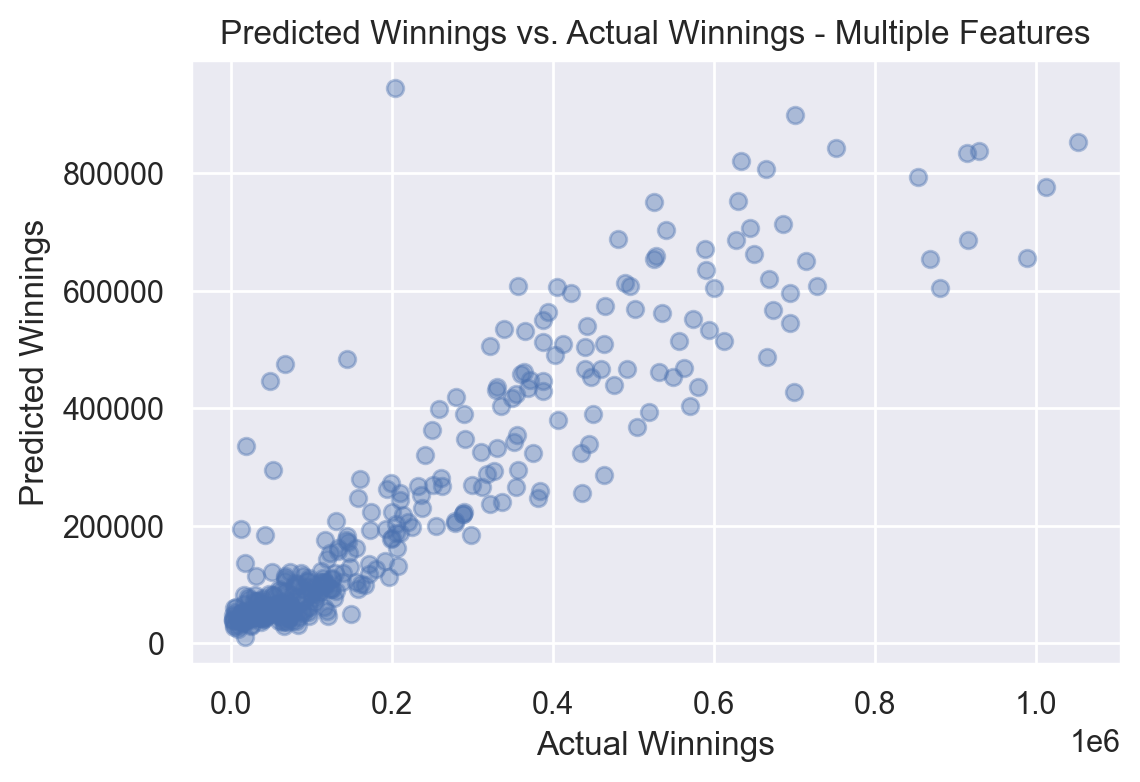

<Figure size 600x400 with 0 Axes>

In [44]:
# select features and value to predict
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings = df[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8, test_size = 0.2)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test,winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test, winnings_prediction, alpha = 0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()